In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Clean the data

In [3]:
# Count the duplicates
df.duplicated().sum()

1

In [4]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
# search for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Hypothesis Testing

### State the Hypothesis & Null Hypothesis

- $H_0$ (Null Hypothesis): smokers have the same Insurance charges as non-smokers.
- $H_A$ (Alternative Hypothesis): There is a significant difference in insurance charges between smokers and non-smokers. 

- Based upon the choosing the Right Hypothesis:
- **The appropriate test to perform would be:**
        - Since we are measuring a numeric quantity (difference in charges)
        - and we are comparing 2 groups/samples. 
        - We therefore want to perform a 2-sample t-test, A.K.A. an independent t-test.
    
- **According the the work flow, the 2-sample T-Test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

## Getting the Group Data

- The next step is to get the data for each group in separate variables. All of the approaches below will lead to the same result: smokers and non-smokers variable.

In [7]:
## Create a column that defines the 2 groups, non_smoker or smoker
df['non_smoker'] = df['smoker'].str.contains('no', case=False)
df

,age,sex,bmi,children,smoker,region,charges,non_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,True
1335,18,female,36.850,0,no,southeast,1629.83350,True
1336,21,female,25.800,0,no,southwest,2007.94500,True


In [8]:
## Separate the column of interest based on the groups
smoker_df = df.loc[ df['non_smoker']==False, ['charges','non_smoker']]
non_smoker_df = df.loc[ df['non_smoker']==True, ['charges','non_smoker']]
print(f"There are {len(non_smoker_df)} Do not smoke." )
print(f"There are {len(smoker_df)} smokes." )

There are 1063 Do not smoke.
There are 274 smokes.


## Visualize Group Means

In [9]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([smoker_df, non_smoker_df], axis=0)
plot_df

,charges,non_smoker
0,16884.9240,False
11,27808.7251,False
14,39611.7577,False
19,36837.4670,False
23,37701.8768,False
...,...,...
1332,11411.6850,True
1333,10600.5483,True
1334,2205.9808,True
1335,1629.8335,True


C:\Users\Admin\AppData\Local\Temp\ipykernel_11436\4091401343.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=plot_df, x='non_smoker', y='charges', ci=68)


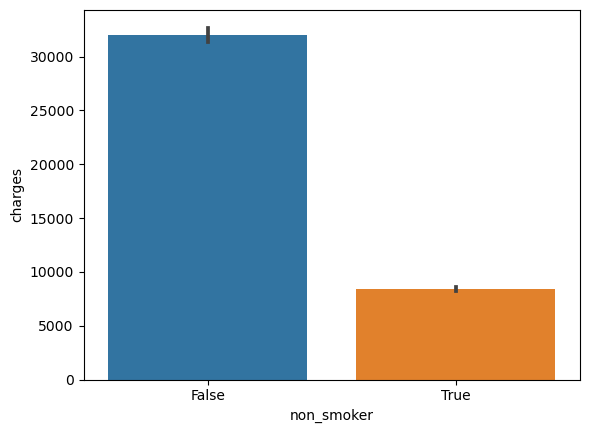

In [10]:
ax = sns.barplot(data=plot_df, x='non_smoker', y='charges', ci=68)

# simplify our workflow by categorizing into groups

In [11]:
non_smoker_group = non_smoker_df['charges']
smoker_group = smoker_df['charges']
display(non_smoker_group.head(), smoker_group.head())

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

## Checking Assumptions of 2-Sample T-test

- **According the the work flow, the 2-sample T-Test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

In [12]:
# checking for outliers
is_outlier_non_smoker = np.abs(stats.zscore(non_smoker_group)) > 3
print(f"There are {is_outlier_non_smoker.sum()} outliers in the non_smoker group out of {len(non_smoker_group)})")

There are 24 outliers in the non_smoker group out of 1063)


In [13]:
non_smoker_df.loc[~is_outlier_non_smoker]

,charges,non_smoker
1,1725.55230,True
2,4449.46200,True
3,21984.47061,True
4,3866.85520,True
5,3756.62160,True
...,...,...
1332,11411.68500,True
1333,10600.54830,True
1334,2205.98080,True
1335,1629.83350,True


In [14]:
## removing outliers from non_smoker_group
non_smoker_group = non_smoker_group.loc[~is_outlier_non_smoker]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1039, dtype: float64

In [15]:
# check outliers in smoker group
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group of out of {len(smoker_group)}.")

There are 0 outliers in the smoker group of out of 274.


In [16]:
### Checking for Equal Variance
result = stats.levene(smoker_group, non_smoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)
True


- According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance. 

- Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance. 

## Statistical Test

In [17]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)


True

## Final Conclusion

- Our Welch's T-Test return a p-value < .05 (it was actually p <.0001!) we reject the null hypothesis and support the alternative hypothesis that there is a significant difference in insurance charges between smokers and non-smokers

- In order to know if they are charged significantly MORE or LESS, we look at the actual means of our final groups.

In [18]:
print(f"Insurance charges for smoker groups was {smoker_group.mean():.2f}")
print(f"Insurance charges for non smoker groups was {non_smoker_group.mean():.2f}")

Insurance charges for smoker groups was 32050.23
Insurance charges for non smoker groups was 7945.92


<AxesSubplot: xlabel='non_smoker', ylabel='charges'>

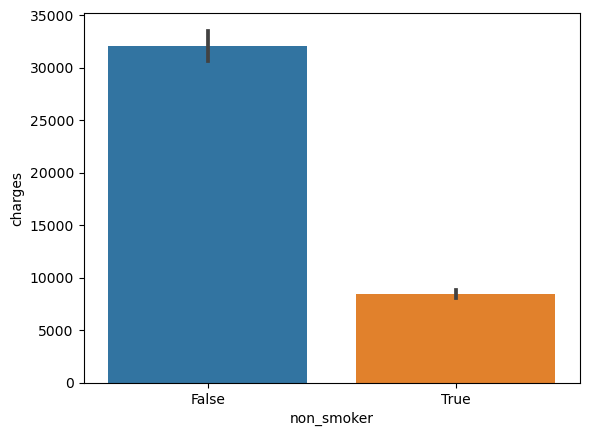

In [19]:
sns.barplot(data=plot_df, x='non_smoker', y='charges')

# Q2. Are men more likely to smoke than women?

- $H_0$ (Null Hypothesis): There is no difference between how much a male smokes and how much a female smokes 
- $H_A$ (Alternative Hypothesis): There is a significant difference between how much a male smokes and how much a female smokes.

- Based upon the choosing the Right Hypothesis:
- **The appropriate test to perform would be:**
        - the Chi-Squared Test

#### The next step is to get the data for each group in separate variables. All of the approaches below will lead to the same result: smokers and non-smokers variable.

In [20]:
## Create a column that defines the 2 groups,male_smoker or female_smoker
df['male_smoker'] = df['sex'].str.contains('male', case=True) & df['non_smoker'] == 'no'
df

,age,sex,bmi,children,smoker,region,charges,non_smoker,male_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,False
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,False
1335,18,female,36.850,0,no,southeast,1629.83350,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,True,False


In [21]:
df = df.drop(columns='male_smoker')
df

,age,sex,bmi,children,smoker,region,charges,non_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,True
1335,18,female,36.850,0,no,southeast,1629.83350,True
1336,21,female,25.800,0,no,southwest,2007.94500,True


In [22]:
## Create a column that defines the 2 groups,male_smoker or female_smoker
df['the_smoker'] = df['smoker'].str.contains('yes', case=True)
df

,age,sex,bmi,children,smoker,region,charges,non_smoker,the_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,False
1335,18,female,36.850,0,no,southeast,1629.83350,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,True,False


In [23]:
## Separate the column of interest based on the groups
male_smoker_df = df.loc[ df['the_smoker']==True, ['the_smoker','sex']]
female_smoker_df = df.loc[ df['the_smoker']==True, ['the_smoker','sex']]
print(f"There are {len(male_smoker_df)} Males." )
print(f"There are {len(female_smoker_df)} Females" )

There are 274 Males.
There are 274 Females


In [24]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([male_smoker_df, female_smoker_df], axis=0)
plot_df

,the_smoker,sex
0,True,female
11,True,female
14,True,male
19,True,male
23,True,female
...,...,...
1313,True,female
1314,True,female
1321,True,male
1323,True,female


#### Getting the Contingency Table with pd.crosstab, In order to run the Chi-Squared Test, we need a contingency table. We'll need to know how many observations from each group variable (sex) fell into which category in the target (the_smoker). Let's use pd.crosstab to calculate this table.


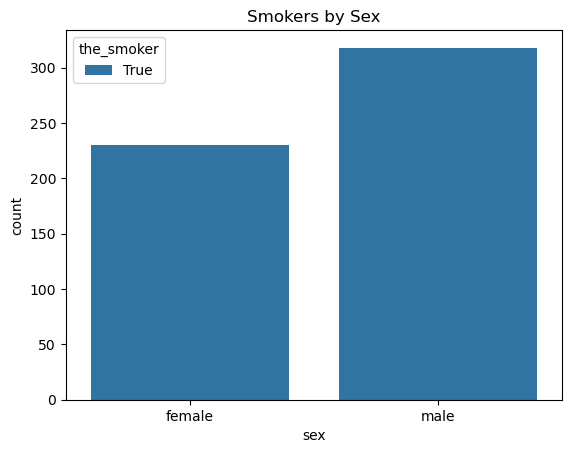

In [37]:
# visualizing
ax = sns.countplot(data=plot_df, x='sex', hue='the_smoker',)
ax.set_title("Smokers by Sex");

#### Getting the Contingency Table with pd.crosstab

In [38]:
# calculate the contingency table with pd.cross-tab
Q2_table = pd.crosstab(df['sex'], df['the_smoker'])
Q2_table

the_smoker,False,True
sex,,
female,547,115
male,516,159


In [40]:
# Run the Test and Save the Output
result = stats.chi2_contingency(Q2_table)
chi2, p, deg_free, expected_vals = result #this labels the results


In [41]:
# What was our p-value?
print(p)
p<.05

0.0062765550120107375


True

#### Since our P value is lesser than 0.05(p < .05), we reject the null hypothesis that there is no difference between how much a male smokes and how much a female smokes.
 

# Q3: Do different regions have different charges, on average?

In [28]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

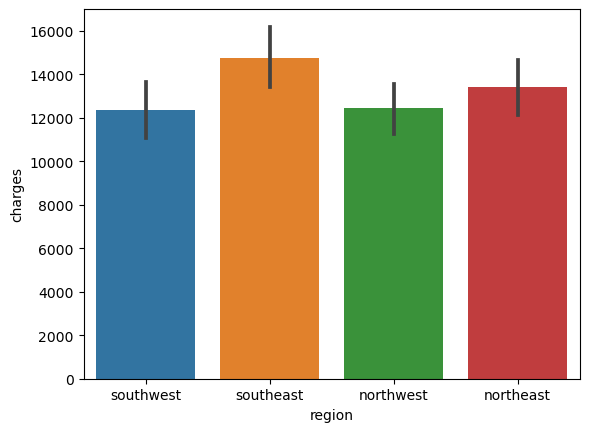

In [29]:
sns.barplot(data=df, x='region',y='charges');

## Hypothesis

- $H_0$ (Null Hypothesis):  Different regions all have the same charges.
- $H_A$ (Alternative Hypothesis): Different regions have different charges.

#### Alpha = .05

In [30]:
## Create groups. There are only 4 regional groups.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Assumption Testing

- **According the the work flow, the ANOVA Test has the following assumptions:** 
    - Normality
    - Equal Variance
    - No significant Outliers

### Normality

In [31]:
## Running normal test on each regional group and confirming there are >20 in each region
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [32]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


#### Equal Variance

In [33]:
# not using * operator, entering each group manually
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])



LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

### ANOVA Test

In [34]:
# performing the correct hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.926139903662776, pvalue=0.03276288025444947)

#### Tukey's Pairwise Multiple Comparisons Test

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## saving the values as harges and the labels to the region
values = df['charges']
labels = df['region']

In [36]:
## tukey's multiple comparison test and summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


Looking at our summary above, Our test shows that there are significant difference in charges between all 4 regional groups 